# Extraer datos de archivos PDF

**PAQUETES USADOS Y LIBRERIAS DEL OS**

> sudo apt-get install ghostscript

> camelot-py

> PyPDF2<3.0

In [53]:
import pandas as pd
import camelot
import matplotlib.pyplot as plt

In [54]:
archivo = "./public/pdf/Analisis Anual 2018 ETAS.pdf"

In [55]:
tabla = camelot.read_pdf(archivo, pages='3')
print(tabla[0].df)

                                                   0  \
0                                      AREA DE SALUD   
1                                                      
2  Ixcán \nSan Marcos \nIxil \nChiquimula \nSanta...   
3  Zacapa \nHuehuetenango \nPetén Sur Occidental ...   
4                                         Total País   

                                                   1  \
0                                               2017   
1                                              Casos   
2              12777 \n64916 \n16229 \n25517 \n22257   
3  13467 \n85754 \n14539 \n10657 \n15657 \n22885 ...   
4                                             662901   

                                                   2  \
0                                                      
1                                              Tasas   
2   10747.00 \n5531.76 \n8131.17 \n5995.79 \n5698.26   
3  5499.70 \n6443.15 \n4960.76 \n4312.31 \n4504.7...   
4                                            3

In [56]:
# tabla[0].df[0][2].split("\n")
# tenemos que convertir el texto a un dataset valido, porque asi como lo han extraido, no es correcto

area = list(map(lambda area: area.strip(), tabla[0].df[0][2].split("\n")))
area.extend(list(map(lambda area: area.strip(), tabla[0].df[0][3].split("\n"))))
area


['Ixcán',
 'San Marcos',
 'Ixil',
 'Chiquimula',
 'Santa Rosa',
 'Zacapa',
 'Huehuetenango',
 'Petén Sur Occidental',
 'Petén Sur Oriental',
 'Retalhuleu',
 'Totonicapán',
 'Escuintla',
 'Sololá',
 'Baja Verapaz',
 'Jutiapa',
 'El Progreso',
 'El Quiche',
 'Quetzaltenango',
 'Alta Verapaz',
 'Jalapa',
 'Petén Norte',
 'Sacatepéquez',
 'Chimaltenango',
 'Izabal',
 'Suchitepéquez',
 'Guatemala Central',
 'Guatemala Nor Occidente',
 'Guatemala Nor Oriente',
 'Guatemala Sur']

In [57]:
# recuperamos los casos 2017 y 2018
# Otra forma de hacerlo es con un for
casos2017 = [int(casos.strip()) for casos in tabla[0].df[1][2].split("\n")]
casos2017.extend([int(casos.strip()) for casos in tabla[0].df[1][3].split("\n")])

casos2018 = [int(casos.strip()) for casos in tabla[0].df[3][2].split("\n")]
casos2018.extend([int(casos.strip()) for casos in tabla[0].df[3][3].split("\n")])

print(casos2017)
print(casos2018)

[12777, 64916, 16229, 25517, 22257, 13467, 85754, 14539, 10657, 15657, 22885, 34013, 22461, 18303, 20941, 7803, 41489, 36489, 43881, 15001, 8075, 12004, 17547, 12510, 11266, 20453, 12895, 7520, 15595]
[15484, 83219, 14009, 28873, 25857, 16111, 87211, 18107, 14694, 19647, 32402, 42681, 28049, 16751, 26002, 8345, 39887, 40949, 58994, 15036, 8973, 11740, 20094, 12887, 12459, 19490, 14370, 8442, 15575]


In [58]:
# ahora recuperamos las tasas de incidencia

tasas2017 = [float(casos.strip()) for casos in tabla[0].df[2][2].split("\n")]
tasas2017.extend([float(casos.strip()) for casos in tabla[0].df[2][3].split("\n")])

tasas2018 = [float(casos.strip()) for casos in tabla[0].df[4][2].split("\n")]
tasas2018.extend([float(casos.strip()) for casos in tabla[0].df[4][3].split("\n")])

print(tasas2017)
print(tasas2018)

[10747.0, 5531.76, 8131.17, 5995.79, 5698.26, 5499.7, 6443.15, 4960.76, 4312.31, 4504.74, 4019.22, 4298.09, 4322.31, 5807.95, 4250.63, 4451.2, 4919.3, 4046.49, 3293.58, 3993.98, 3301.02, 3367.29, 2424.97, 2616.37, 1890.35, 2056.39, 1532.4, 1411.86, 1448.55]
[12559.72, 6937.18, 6775.49, 6629.64, 6485.1, 6464.7, 6409.3, 5980.51, 5787.55, 5533.66, 5533.33, 5295.25, 5252.97, 5181.3, 5165.63, 4677.95, 4587.3, 4446.17, 4302.25, 3895.74, 3553.11, 3233.51, 2704.24, 2632.93, 2042.5, 1959.05, 1690.64, 1550.66, 1416.07]


In [59]:
# DATASET FINAL

ETAS = pd.DataFrame(area, columns=["Area de salud"])
ETAS["Casos 2017"] = casos2017
ETAS["Tasa 2017"] = tasas2017
ETAS["Casos 2018"] = casos2018
ETAS["Tasa 2018"] = tasas2018
ETAS

,Area de salud,Casos 2017,Tasa 2017,Casos 2018,Tasa 2018
0,Ixcán,12777,10747.00,15484,12559.72
1,San Marcos,64916,5531.76,83219,6937.18
2,Ixil,16229,8131.17,14009,6775.49
3,Chiquimula,25517,5995.79,28873,6629.64
4,Santa Rosa,22257,5698.26,25857,6485.10
5,Zacapa,13467,5499.70,16111,6464.70
6,Huehuetenango,85754,6443.15,87211,6409.30
7,Petén Sur Occidental,14539,4960.76,18107,5980.51
8,Petén Sur Oriental,10657,4312.31,14694,5787.55
9,Retalhuleu,15657,4504.74,19647,5533.66


In [60]:
ETAS.describe()

,Casos 2017,Tasa 2017,Casos 2018,Tasa 2018
count,29.000000,29.000000,29.000000,29.000000
mean,22858.655172,4319.882414,26080.620690,4782.187931
std,17573.564154,2037.263456,20209.094508,2284.237179
min,7520.000000,1411.860000,8345.000000,1416.070000
25%,12777.000000,3293.580000,14370.000000,3233.510000
50%,16229.000000,4298.090000,18107.000000,5165.630000
75%,22885.000000,5499.700000,28873.000000,5980.510000
max,85754.000000,10747.000000,87211.000000,12559.720000


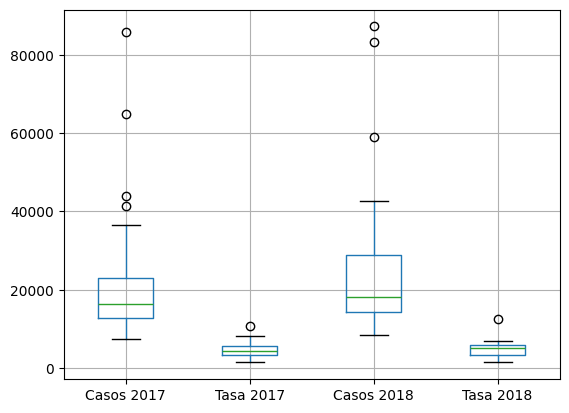

In [61]:
ETAS.boxplot();
plt.show()

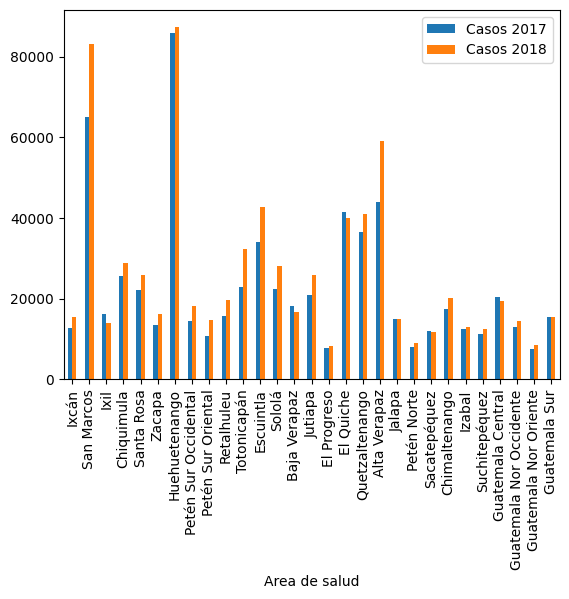

In [62]:
ETAS.plot(x="Area de salud", y=["Casos 2017", "Casos 2018"], kind="bar");
plt.show()